In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [256]:
df = pd.read_csv("/content/Fortune 1000 Companies by Revenue.csv")

In [257]:
df.shape

(1000, 10)

In [258]:
df.head()

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
0,1,Walmart,"$572,754",2.40%,"$13,673",1.20%,"$244,860","$409,795",-,"2,300,000"
1,2,Amazon,"$469,822",21.70%,"$33,364",56.40%,"$420,549","$1,658,807.30",-,"1,608,000"
2,3,Apple,"$365,817",33.30%,"$94,680",64.90%,"$351,002","$2,849,537.60",-,"154,000"
3,4,CVS Health,"$292,111",8.70%,"$7,910",10.20%,"$232,999","$132,839.20",-,"258,000"
4,5,UnitedHealth Group,"$287,597",11.80%,"$17,285",12.20%,"$212,206","$479,830.30",-,"350,000"


In [259]:
df.isna().sum()

rank                      0
name                      0
revenues                  0
revenue_percent_change    0
profits                   0
profits_percent_change    0
assets                    0
market_value              0
change_in_rank            0
employees                 0
dtype: int64

In [260]:
df.columns

Index(['rank ', 'name ', 'revenues ', 'revenue_percent_change', 'profits ',
       'profits_percent_change', 'assets', 'market_value ', 'change_in_rank',
       'employees '],
      dtype='object')

In [261]:
df.columns = df.columns.str.strip()

In [262]:
df["revenues"] = df["revenues"].str.replace("$","").str.replace(",","")

In [263]:
df["revenue_percent_change"] = df["revenue_percent_change"].str.replace("%","")

In [264]:
df["profits"] = df["profits"].str.replace("$","").str.replace(",","")

In [265]:
df["profits_percent_change"]  = df["profits_percent_change"].str.replace("%","")

In [266]:
df["assets"] = df["assets"].str.replace("$","").str.replace(",","")

In [267]:
df["market_value"] = df["market_value"].str.replace("$","").str.replace(",","")

In [268]:
df["employees"] = df["employees"].str.replace(",","")

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   rank                    1000 non-null   object
 1   name                    1000 non-null   object
 2   revenues                1000 non-null   object
 3   revenue_percent_change  1000 non-null   object
 4   profits                 1000 non-null   object
 5   profits_percent_change  1000 non-null   object
 6   assets                  1000 non-null   object
 7   market_value            1000 non-null   object
 8   change_in_rank          1000 non-null   object
 9   employees               1000 non-null   object
dtypes: object(10)
memory usage: 78.2+ KB


In [270]:
df.sample(4)

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
242,243,Edison International,14905,9.80,759,2.70,74745,26693.80,-17,13003
659,660,American National Group,4391.80,15.80,699.30,49.60,31320.30,5084.10,-24,4545
253,254,Otis Worldwide,14298,12.10,1246,37.50,12279,32700.90,-18,70000
983,984,Pure Storage,2180.80,29.50,(143.30),-,3135.30,10238,-,4200


In [271]:
# change revenues column to float type
df["revenues"] = df["revenues"].astype(float)

In [272]:
#  Replace hyphens with negative(-) and then convert to float
df["profits"] = df["profits"].replace("-", "-1", regex=True)

In [273]:
df["profits"].head(10)

0      13673 
1      33364 
2      94680 
3       7910 
4      17285 
5      23040 
6      89795 
7      76033 
8      (4539)
9    1539.90 
Name: profits, dtype: object

In [274]:
def remove_pren(x):
  if x[0] == "(":
    return "-"+x[1:-1]
  else:
    return x
df["profits"] = df["profits"].apply(remove_pren)

In [275]:
df["profits"].head(10)

0      13673 
1      33364 
2      94680 
3       7910 
4      17285 
5      23040 
6      89795 
7      76033 
8       -4539
9    1539.90 
Name: profits, dtype: object

In [276]:
def to_float(x):
  if x[0] == "-":
    return float(x[1:]) * -1
  else:
    return float(x)

df["profits"] = df["profits"].apply(to_float)

In [277]:
df["profits"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: profits
Non-Null Count  Dtype  
--------------  -----  
1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rank                    1000 non-null   object 
 1   name                    1000 non-null   object 
 2   revenues                1000 non-null   float64
 3   revenue_percent_change  1000 non-null   object 
 4   profits                 1000 non-null   float64
 5   profits_percent_change  1000 non-null   object 
 6   assets                  1000 non-null   object 
 7   market_value            1000 non-null   object 
 8   change_in_rank          1000 non-null   object 
 9   employees               1000 non-null   object 
dtypes: float64(2), object(8)
memory usage: 78.2+ KB


In [279]:
df.sample(2)

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
435,436,Booz Allen Hamilton Holding,7858.9,5.30,609.0,26.20,5499.60,11705.40,-45,27700
868,869,West Pharmaceutical Services,2831.6,31.90,661.8,91.20,3313.80,30508.20,56,10065


In [280]:
df["profits_percent_change"].str.strip()

0         1.20
1        56.40
2        64.90
3        10.20
4        12.20
        ...   
995    -138.40
996     101.10
997      36.60
998          -
999          -
Name: profits_percent_change, Length: 1000, dtype: object

In [281]:
def to_float_with_empty(x):
    x = x.strip()
    if not x:  # if x is empty or contains only whitespace
        return np.nan
    try:
        if x[0] == "-":
            return float(x[1:-1]) * -1
        else:
            return float(x)
    except ValueError:
        return np.nan

df["profits_percent_change"] = df["profits_percent_change"].apply(to_float_percent)

In [282]:
df["profits_percent_change"]

0        1.2
1       56.4
2       64.9
3       10.2
4       12.2
       ...  
995   -138.4
996    101.1
997     36.6
998      NaN
999      NaN
Name: profits_percent_change, Length: 1000, dtype: float64

In [283]:
df.columns

Index(['rank', 'name', 'revenues', 'revenue_percent_change', 'profits',
       'profits_percent_change', 'assets', 'market_value', 'change_in_rank',
       'employees'],
      dtype='object')

In [284]:
df.sample(2)

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
406,407,Global Payments,8523.8,14.80,965.5,65.2,45279.70,38545.60,-13,25000
909,910,Encore Wire,2592.7,103,541.4,611.8,1530.50,2250.30,-,1440


In [285]:
df["assets"] = df["assets"].astype(float)

In [286]:
df["market_value"]  = df["market_value"].apply(to_float_with_empty)

In [287]:
df["change_in_rank"] = df["change_in_rank"].apply(to_float_with_empty)

In [288]:
df["employees"] = df["employees"].apply(to_float_with_empty)

In [289]:
df["revenue_percent_change"] = df["revenue_percent_change"].apply(to_float_with_empty)

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rank                    1000 non-null   object 
 1   name                    1000 non-null   object 
 2   revenues                1000 non-null   float64
 3   revenue_percent_change  984 non-null    float64
 4   profits                 1000 non-null   float64
 5   profits_percent_change  724 non-null    float64
 6   assets                  1000 non-null   float64
 7   market_value            955 non-null    float64
 8   change_in_rank          801 non-null    float64
 9   employees               999 non-null    float64
dtypes: float64(8), object(2)
memory usage: 78.2+ KB


In [291]:
df.isna().sum()

rank                        0
name                        0
revenues                    0
revenue_percent_change     16
profits                     0
profits_percent_change    276
assets                      0
market_value               45
change_in_rank            199
employees                   1
dtype: int64

In [292]:
df.isna().mean()*100

rank                       0.0
name                       0.0
revenues                   0.0
revenue_percent_change     1.6
profits                    0.0
profits_percent_change    27.6
assets                     0.0
market_value               4.5
change_in_rank            19.9
employees                  0.1
dtype: float64

In [298]:
df.head(10).sort_values("profits", ascending=False)

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
2,3,Apple,365817.0,33.3,94680.0,64.9,351002.0,2849537.6,NaN,154000.0
6,7,Berkshire Hathaway,276094.0,12.5,89795.0,111.2,958784.0,779542.3,NaN,372000.0
7,8,Alphabet,257637.0,41.2,76033.0,88.8,359268.0,1842326.1,1.0,156500.0
1,2,Amazon,469822.0,21.7,33364.0,56.4,420549.0,1658807.3,NaN,1608000.0
5,6,Exxon Mobil,285640.0,57.4,23040.0,NaN,338923.0,349652.4,4.0,63000.0
4,5,UnitedHealth Group,287597.0,11.8,17285.0,12.2,212206.0,479830.3,NaN,350000.0
0,1,Walmart,572754.0,2.4,13673.0,1.2,244860.0,409795.0,NaN,2300000.0
3,4,CVS Health,292111.0,8.7,7910.0,10.2,232999.0,132839.2,NaN,258000.0
9,10,AmerisourceBergen,213988.8,12.7,1539.9,NaN,57337.8,32355.7,NaN,40000.0
8,9,McKesson,238228.0,3.1,-4539.0,-604.3,65015.0,45857.8,NaN,67500.0


<Axes: xlabel='name'>

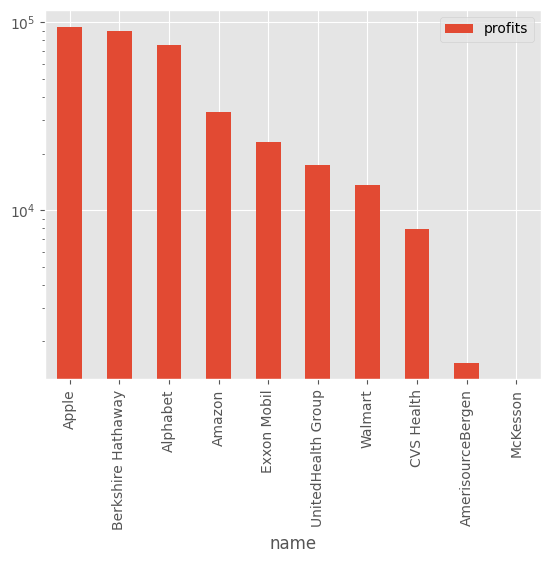

In [302]:
df.head(10).sort_values("profits", ascending=False).plot(kind="bar", x="name", y="profits", log=True)

In [304]:
df.head()

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
0,1,Walmart,572754.0,2.4,13673.0,1.2,244860.0,409795.0,NaN,2300000.0
1,2,Amazon,469822.0,21.7,33364.0,56.4,420549.0,1658807.3,NaN,1608000.0
2,3,Apple,365817.0,33.3,94680.0,64.9,351002.0,2849537.6,NaN,154000.0
3,4,CVS Health,292111.0,8.7,7910.0,10.2,232999.0,132839.2,NaN,258000.0
4,5,UnitedHealth Group,287597.0,11.8,17285.0,12.2,212206.0,479830.3,NaN,350000.0


In [309]:
# find all rows that has NaN in change_in_rank column
df.loc[df["change_in_rank"].isna()]

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
0,1,Walmart,572754.0,2.4,13673.0,1.2,244860.0,409795.0,NaN,2300000.0
1,2,Amazon,469822.0,21.7,33364.0,56.4,420549.0,1658807.3,NaN,1608000.0
2,3,Apple,365817.0,33.3,94680.0,64.9,351002.0,2849537.6,NaN,154000.0
3,4,CVS Health,292111.0,8.7,7910.0,10.2,232999.0,132839.2,NaN,258000.0
4,5,UnitedHealth Group,287597.0,11.8,17285.0,12.2,212206.0,479830.3,NaN,350000.0
...,...,...,...,...,...,...,...,...,...,...
993,994,Genesis Energy,2125.5,16.5,-165.1,NaN,5905.8,1435.4,NaN,1898.0
995,996,Vizio Holding,2124.0,4.0,-39.4,-138.4,935.8,1705.1,NaN,800.0
996,997,1-800-Flowers.com,2122.2,42.5,118.7,101.1,1076.7,830.0,NaN,4800.0
997,998,Cowen,2112.8,30.2,295.6,36.6,8748.8,744.1,NaN,1534.0


In [320]:
df.head()

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
0,1,Walmart,572754.0,2.4,13673.0,1.2,244860.0,409795.0,NaN,2300000.0
1,2,Amazon,469822.0,21.7,33364.0,56.4,420549.0,1658807.3,NaN,1608000.0
2,3,Apple,365817.0,33.3,94680.0,64.9,351002.0,2849537.6,NaN,154000.0
3,4,CVS Health,292111.0,8.7,7910.0,10.2,232999.0,132839.2,NaN,258000.0
4,5,UnitedHealth Group,287597.0,11.8,17285.0,12.2,212206.0,479830.3,NaN,350000.0


In [336]:
# only display name and revenue columns
df[["name", "revenues", "revenue_percent_change"]].sort_values("revenue_percent_change", ascending=False).head(10)

,name,revenues,revenue_percent_change
194,Moderna,18471.0,2199.1
814,Change Healthcare,3090.4,1470.4
866,Annaly Capital Management,2836.2,1188.5
436,Coinbase Global,7839.4,513.7
746,New Residential Investment,3533.1,512.8
385,Apollo Global Management,9124.0,332.2
170,Cleveland-Cliffs,20444.0,281.8
158,Blackstone,22577.1,270.0
507,Live Nation Entertainment,6268.4,236.8
687,Bright Health Group,4029.4,233.7


<Axes: title={'center': 'Top 10 Companies by Revenue Percent Change'}, xlabel='name'>

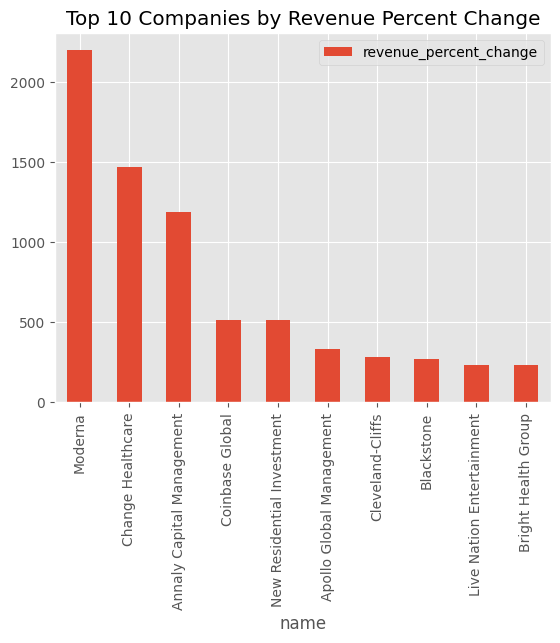

In [338]:
df[["name", "revenues", "revenue_percent_change"]].sort_values("revenue_percent_change", ascending=False).head(10)\
.plot(kind="bar", x="name", y="revenue_percent_change", title="Top 10 Companies by Revenue Percent Change")

In [341]:
df.sample(2)

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
132,133,NRG Energy,26989.0,196.8,2187.0,328.8,23182.0,9289.0,200.0,6635.0
615,616,Scotts Miracle-Gro,4925.0,19.2,512.5,32.3,4800.0,6834.6,NaN,8050.0


In [343]:
df[["name", "rank", "employees"]].sort_values("employees", ascending=False).head(15)

,name,rank,employees
0,Walmart,1,2300000.0
1,Amazon,2,1608000.0
16,Home Depot,17,490600.0
38,FedEx,39,484000.0
31,Target,32,450000.0
20,Kroger,21,420000.0
33,UPS,34,400945.0
119,Starbucks,120,383000.0
6,Berkshire Hathaway,7,372000.0
4,UnitedHealth Group,5,350000.0


<Axes: title={'center': 'Top 15 companies by number of employees'}, ylabel='name'>

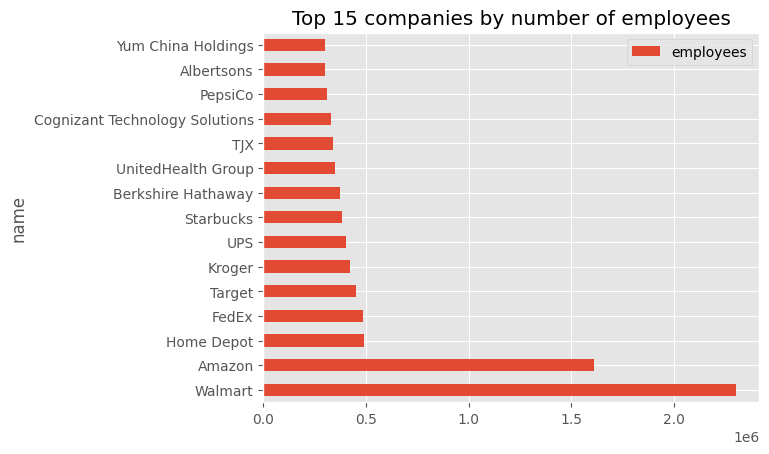

In [346]:
# plot top companies with highest employees
df[["name", "rank", "employees"]].sort_values("employees", ascending=False).head(15)\
.plot(kind="barh", x="name", y="employees", title="Top 15 companies by number of employees")

In [347]:
df.head()

,rank,name,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
0,1,Walmart,572754.0,2.4,13673.0,1.2,244860.0,409795.0,NaN,2300000.0
1,2,Amazon,469822.0,21.7,33364.0,56.4,420549.0,1658807.3,NaN,1608000.0
2,3,Apple,365817.0,33.3,94680.0,64.9,351002.0,2849537.6,NaN,154000.0
3,4,CVS Health,292111.0,8.7,7910.0,10.2,232999.0,132839.2,NaN,258000.0
4,5,UnitedHealth Group,287597.0,11.8,17285.0,12.2,212206.0,479830.3,NaN,350000.0


In [350]:
df[["name", "rank", "profits_percent_change"]].sort_values("profits_percent_change")

,name,rank,profits_percent_change
947,Ohio National Mutual,948,-177495.8
332,AES,333,-989.1
8,McKesson,9,-604.3
817,Hyster-Yale Materials Handling,818,-566.3
750,Sprague Resources,751,-303.8
...,...,...,...
987,Dropbox,988,NaN
990,Harsco,991,NaN
993,Genesis Energy,994,NaN
998,Ashland Global Holdings,999,NaN


<Axes: title={'center': 'Top 10 least performing companies'}, ylabel='Density'>

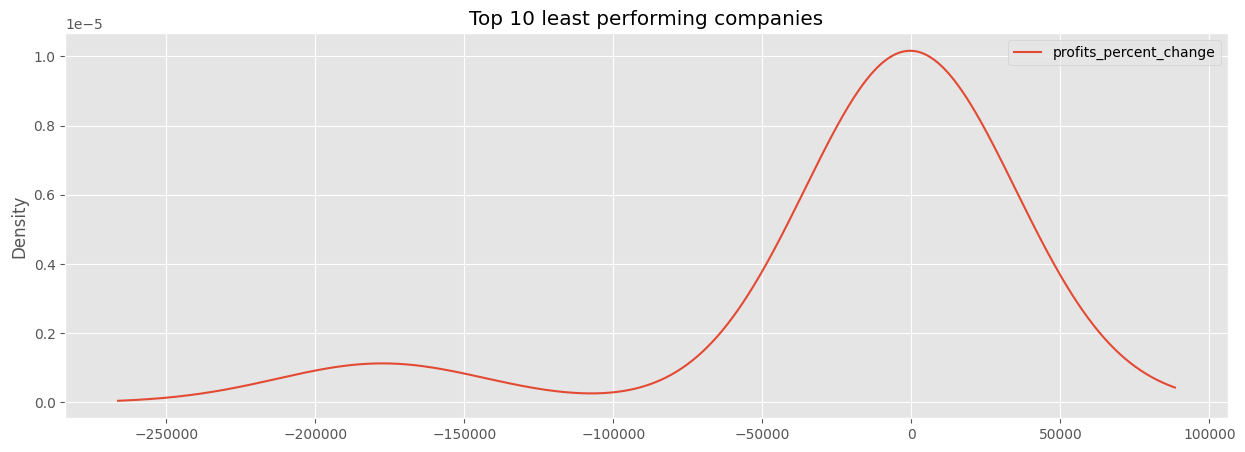

In [362]:
df[["name", "rank", "profits_percent_change"]].sort_values("profits_percent_change").head(10)\
.plot(kind="kde", figsize=(15,5), x="name", y="profits_percent_change", title="Top 10 least performing companies")

In [363]:
df[["name",'rank', 'assets']].sort_values("assets", ascending=False).head(10)

,name,rank,assets
32,Fannie Mae,33,4229166.0
23,JPMorgan Chase,24,3743567.0
35,Bank of America,36,3169495.0
55,Freddie Mac,56,3025586.0
43,Citigroup,44,2291413.0
40,Wells Fargo,41,1948068.0
56,Goldman Sachs Group,57,1463988.0
60,Morgan Stanley,61,1188140.0
6,Berkshire Hathaway,7,958784.0
50,Prudential Financial,51,937582.0


<Axes: title={'center': 'Top 10 companies by assets'}, xlabel='name'>

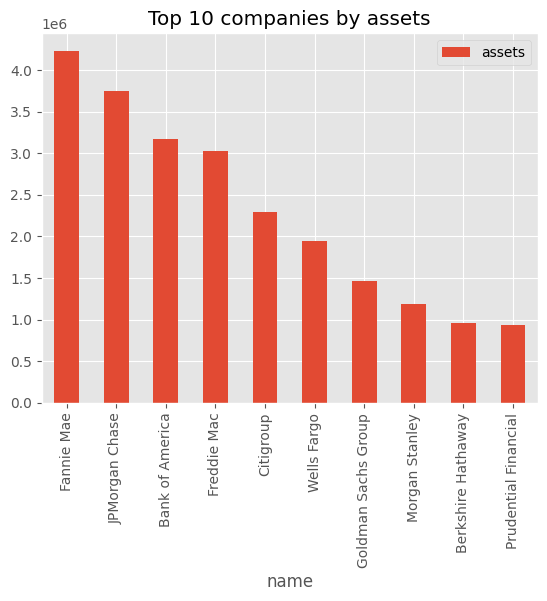

In [364]:
df[["name",'rank', 'assets']].sort_values("assets", ascending=False).head(10)\
.plot(kind="bar", x="name", y="assets", title="Top 10 companies by assets")

In [365]:
df[["name", "rank", "market_value"]].sort_values("market_value", ascending=False).head(10)

,name,rank,market_value
2,Apple,3,2849537.6
13,Microsoft,14,2311358.9
7,Alphabet,8,1842326.1
1,Amazon,2,1658807.3
64,Tesla,65,1113707.8
6,Berkshire Hathaway,7,779542.3
133,Nvidia,134,684878.6
26,Meta Platforms,27,605251.0
146,Visa,147,480022.5
4,UnitedHealth Group,5,479830.3


<Axes: title={'center': 'Top 10 companies by market value'}, xlabel='name'>

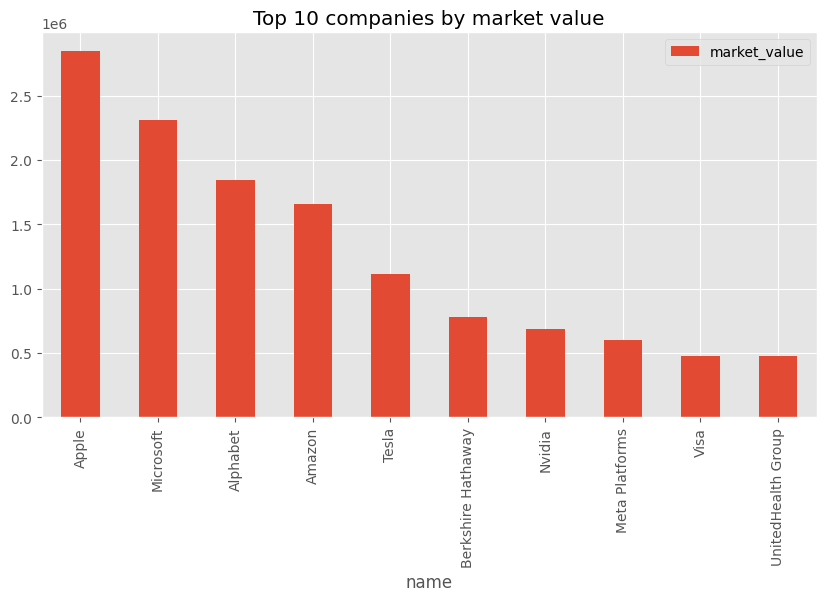

In [367]:
df[["name", "rank", "market_value"]].sort_values("market_value", ascending=False).head(10)\
.plot(kind="bar", figsize=(10, 5), x="name", y="market_value", title="Top 10 companies by market value")

In [371]:
correlation_matrix = df.corr(numeric_only=True)

In [373]:
correlation_matrix

,revenues,revenue_percent_change,profits,profits_percent_change,assets,market_value,change_in_rank,employees
revenues,1.000000,-0.023036,0.651489,0.003101,0.302837,0.615788,-0.045493,0.732214
revenue_percent_change,-0.023036,1.000000,0.024213,0.023050,-0.034405,-0.002533,0.908256,-0.044575
profits,0.651489,0.024213,1.000000,0.004238,0.467013,0.826456,-0.043183,0.337674
profits_percent_change,0.003101,0.023050,0.004238,1.000000,-0.002752,-0.021923,0.025949,0.012821
assets,0.302837,-0.034405,0.467013,-0.002752,1.000000,0.187247,-0.061037,0.160363
market_value,0.615788,-0.002533,0.826456,-0.021923,0.187247,1.000000,-0.031943,0.368709
change_in_rank,-0.045493,0.908256,-0.043183,0.025949,-0.061037,-0.031943,1.000000,-0.104325
employees,0.732214,-0.044575,0.337674,0.012821,0.160363,0.368709,-0.104325,1.000000


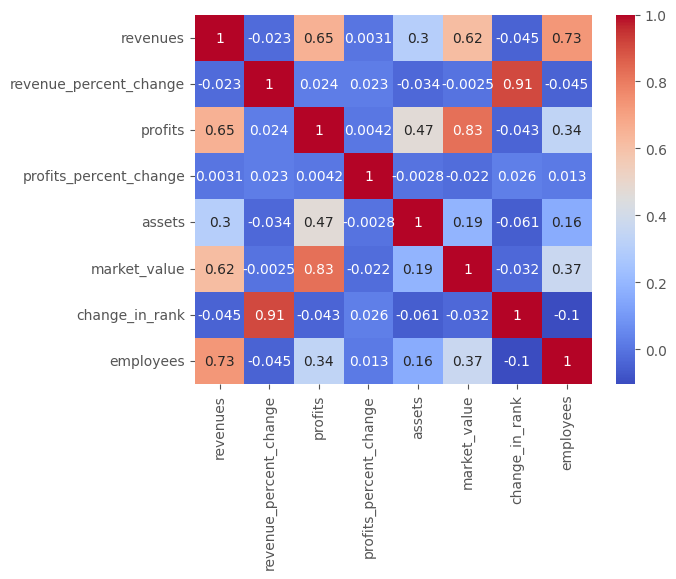

In [378]:
# plot heatmap for correlation_matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

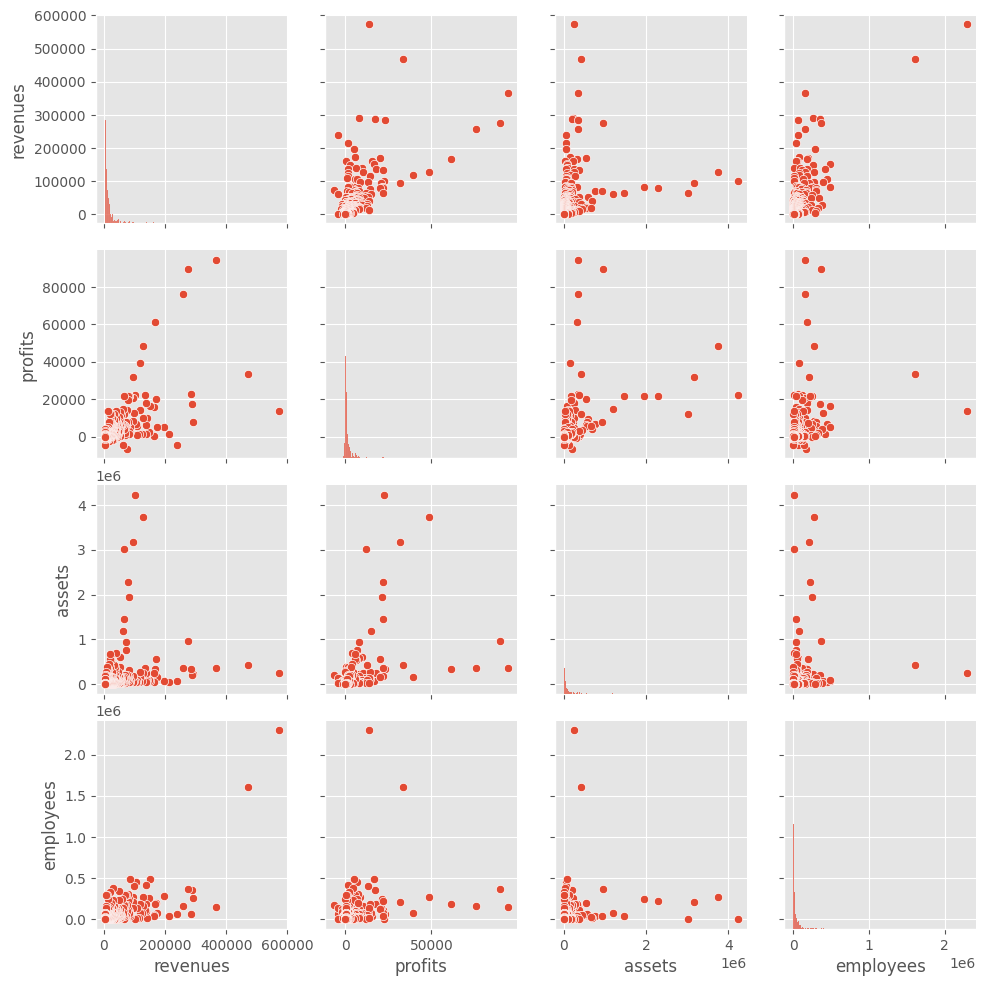

In [379]:
# pairplot
sns.pairplot(df[["revenues", "profits", "assets", "employees"]])
plt.show()